<a href="https://colab.research.google.com/github/pks98/NLP_Reviews/blob/main/EDA_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df=pd.read_csv('reviews.csv',usecols=['Review_Title','Reviews','Rating'])
df.head()

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0
2,Good,1. Quite good look2. Better noise cancellation...,4.0
3,not great,its a good set of ear buds but1. the quality o...,1.0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0


## Finding for duplicate records

In [8]:
df[df.duplicated()]

,Review_Title,Reviews,Rating
1809,Don't waste your money,The media could not be loaded.,1.0
2141,Good product,NaN,5.0
2382,Value for money,The media could not be loaded.,4.0


## Replacing **'The media cannot be loaded'** reviews with empty string

In [12]:
df[df['Reviews']=='The media cannot be loaded']

,Review_Title,Reviews,Rating
54,Great if you get non-defective piece.,The media could not be loaded.,1.0
86,The worlds worst customer service ever !,The media could not be loaded.,2.0
94,E-waste for the dumpyards,The media could not be loaded.,1.0
99,Uncomfortable!!,The media could not be loaded.,3.0
114,Not for Everyone,The media could not be loaded.,4.0
...,...,...,...
3431,Right ear bud not working after using for 4 mo...,The media could not be loaded.,3.0
3481,AUDIO QUALITY - PERFECT.,The media could not be loaded.,5.0
3543,Dissatisfied,The media could not be loaded.,1.0
3571,quality,The media could not be loaded.,4.0


In [13]:
def data_clean(text):
  if text=='The media could not be loaded.':
    return " "
  else:
    return text

In [15]:
df['Reviews']=df['Reviews'].apply(data_clean)

In [18]:
df.sample(10)

,Review_Title,Reviews,Rating
1544,Left ear bud faulty again with the replacement...,The left earbud has a static sound going on al...,1.0
749,WORST EXPERIENCE Please do not purchase,NaN,1.0
2671,Poor voice quality.,,1.0
2587,Worth of money,sound quality awesome.But buttons are too acti...,4.0
2435,Average..Not so easy on ears...poor fitting,Does pain in the ears after wearing for more t...,1.0
3399,Great product in budget,Good product for 1750 rs in sale...its rough a...,4.0
3067,"Amazon deleting my reviews from 2,3 days and w...",First it was working good.. but after few hour...,2.0
1158,Excellent Value for the price.,"Given the price, this pair is solid in terms o...",5.0
1141,Not Confortable,Ok let me start with the sound>Sound quality i...,4.0
3147,Good product,It's not 🚫 fit for someone who have small ear ...,4.0


## Imputing the **nan** values with empty string

In [20]:
df.isnull().sum()

Review_Title      0
Reviews         103
Rating            0
dtype: int64

In [21]:
df.fillna('',inplace=True)

In [22]:
df.isnull().sum()

Review_Title    0
Reviews         0
Rating          0
dtype: int64

## Joining the **Review_Title** and **Reviews** column and considering it as one column called text

In [24]:
df['text']=df['Review_Title']+' '+df['Reviews']

In [26]:
df.sample(10)

,Review_Title,Reviews,Rating,text
342,Serves the purpose...👍,Overall I really liked the product based on be...,5.0,Serves the purpose...👍 Overall I really liked ...
1350,Go for these if ur looking earbuds for amazing...,I was very skeptical at first abt these earbud...,5.0,Go for these if ur looking earbuds for amazing...
1704,Satisfaction not up to the mark,Look wise good quality also good specialy red ...,2.0,Satisfaction not up to the mark Look wise good...
1771,Poor Quality,I have been trying to use this product for las...,1.0,Poor Quality I have been trying to use this pr...
1400,Not upto the mark,Uncomfortable to wear.Poor sound quality.Capac...,1.0,Not upto the mark Uncomfortable to wear.Poor s...
433,Sound Reception Issue,These earbuds are ofcourse really good for hav...,5.0,Sound Reception Issue These earbuds are ofcour...
517,Sound quality superb but build connectivity sucks,"If you are a fan of bass, you will definitely ...",1.0,Sound quality superb but build connectivity su...
3475,how can Amazon do so with customers 😫,Very disappointed with Amazon product is good ...,5.0,how can Amazon do so with customers 😫 Very dis...
1405,It is not charging for one of the earpods,,1.0,It is not charging for one of the earpods
382,"my ears won't listen to me anymore, and surely...",SECTION 1about my ratings; (optional to read)E...,5.0,"my ears won't listen to me anymore, and surely..."


## Creating binary clssification for target column


*   if rating is greater or equal to 4 then it is considered as positive
*   if rating is less than 4 then it is considered as negative



In [27]:
def rating_classify(rating):
  if rating>=4:
    return 1
  else:
    return 0

In [29]:
df['label']=df['Rating'].apply(rating_classify)

In [30]:
df.sample(5)

,Review_Title,Reviews,Rating,text,label
3158,Don't Purchase Online,Sound quality is good but microphone quality i...,4.0,Don't Purchase Online Sound quality is good bu...,1
1667,Awesome earbuds with good bass and nice batter...,This earpods provides good sound quality. But...,5.0,Awesome earbuds with good bass and nice batter...,1
904,One Ear bud stops working - Even after factory...,Doing this review after using it for more than...,1.0,One Ear bud stops working - Even after factory...,0
1424,"After use of 20 days i feel good bass,but disc...","After use of 20 days,I buy it name of boAt.But...",1.0,"After use of 20 days i feel good bass,but disc...",0
686,Really good wireless headsets worth the price.,Best product worth the money.I bought it for R...,5.0,Really good wireless headsets worth the price....,1


## Dropping **Review_Title**, **Reviews** ,**Rating** columns as it is not required for further processing

In [34]:
df.drop(['Review_Title', 'Reviews', 'Rating'],axis=1,inplace=True)

In [36]:
df.head()

,text,label
0,AWESOME...IN LOVE WITH IT ! Really impressed w...,1
1,Enjoy while it lasts This is the second time I...,0
2,Good 1. Quite good look2. Better noise cancell...,1
3,not great its a good set of ear buds but1. the...,0
4,Best buds in the budget with Type C I have bee...,1


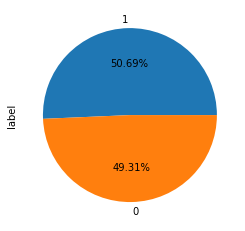

In [37]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')

## Text Preprocessing

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
port_stem=PorterStemmer()
def text_processing(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [42]:
df['text']=df['text'].apply(text_processing)

In [44]:
df.sample(10)

,text,label
1572,amaz product love big fan earphon spend much o...,1
319,legendari perform best truli wireless earbud g...,1
2057,better rang price good price rang could wear h...,0
1488,good sound good connect good macbook mic sound...,1
867,excel experi fare way better expect provid goo...,1
1433,product good money wanna give real review ever...,0
1778,connect issu sometim laptop listen music lapto...,1
227,need work qualiti music ok use coupl day exper...,1
3518,bass qualiti though bass boom annoy fix ear we...,0
906,worst product right earphon stop function comp...,0


## Word cloud

Wordcloud for entire reviews

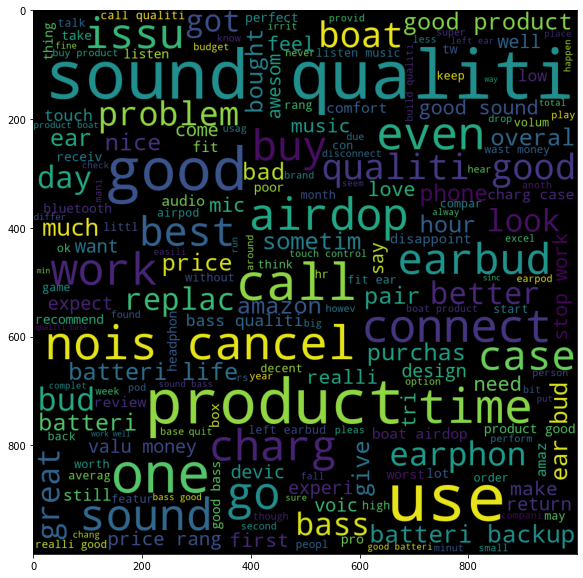

In [46]:
from wordcloud import WordCloud

wc=WordCloud(width=1000,height=1000)
wordcloud=wc.generate(df['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

Wordcloud for only positive reviews

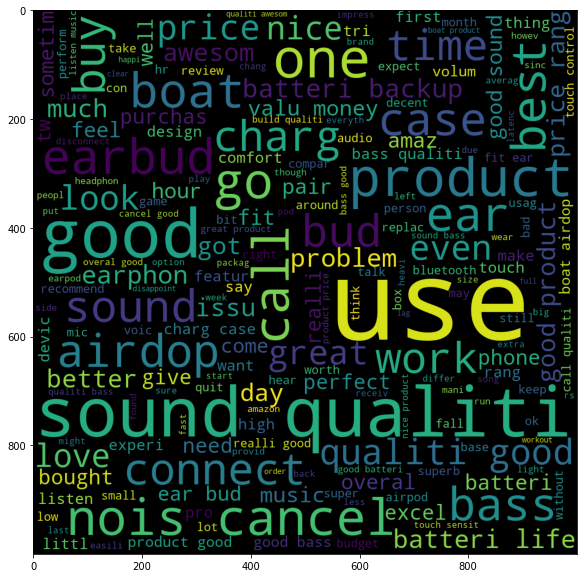

In [48]:
wc=WordCloud(width=1000,height=1000)
positive_wordcloud=wc.generate(df[df['label']==1]['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(positive_wordcloud)

Wordcloud only for negative reviews

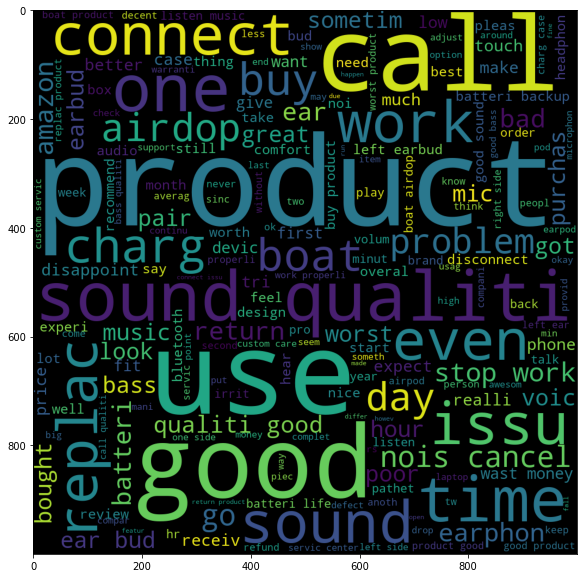

In [49]:
wc=WordCloud(width=1000,height=1000)
negative_wordcloud=wc.generate(df[df['label']==0]['text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(negative_wordcloud)

In [50]:
positive_corpus=[]
for reviews in df[df['label']==1]['text'].tolist():
  for word in reviews.split():
    positive_corpus.append(word)

In [51]:
len(positive_corpus)

71503

In [52]:
negative_corpus=[]
for reviews in df[df['label']==0]['text'].tolist():
  for word in reviews.split():
    negative_corpus.append(word)

In [53]:
len(negative_corpus)

64502

## Extracting **top 50 words** form both **positive_corpus** and **negative_corpus**

In [54]:
from collections import Counter

positive_corpus_data=Counter(positive_corpus).most_common(50)
positive_corpus_df=pd.DataFrame(positive_corpus_data,columns=['word','frequency'])

In [55]:
negative_corpus_data=Counter(negative_corpus).most_common(50)
negative_corpus_df=pd.DataFrame(negative_corpus_data,columns=['word','frequency'])

Top 50 positive words

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


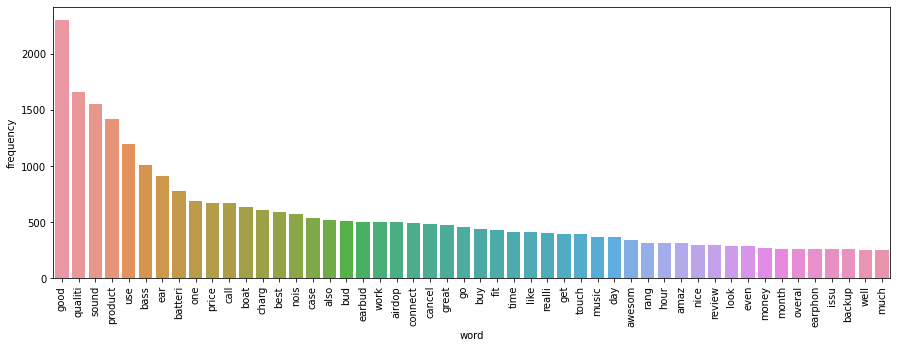

In [56]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(positive_corpus_df['word'],positive_corpus_df['frequency'])

Top 50 negative words

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


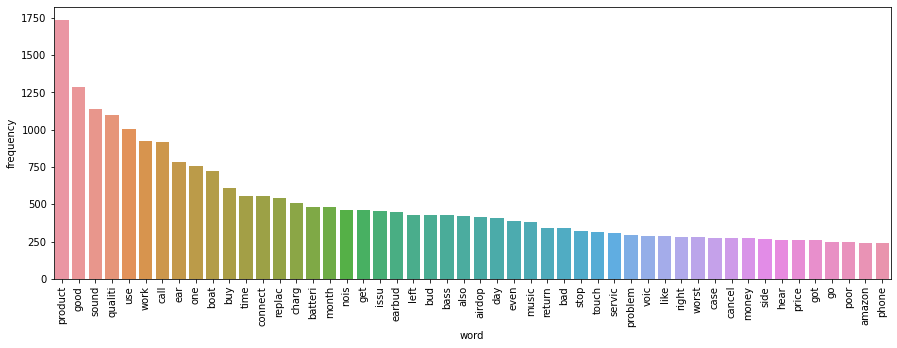

In [57]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(negative_corpus_df['word'],negative_corpus_df['frequency'])